In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
#url = 'https://www.kaggleusercontent.com/balaka18/email-spam-classification-dataset-csv'
#df = pd.read_csv(url)

#or 

df = pd.read_csv("emails.csv")

In [6]:
# Display basic information
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [9]:
df.columns


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [10]:
# Separate features (X) and target (y)
X = df.drop(columns=['Email No.', 'Prediction'])  # Drop 'Email No.' and target column 'Prediction'
y = df['Prediction']  # Assuming 'Prediction' is the target column (0: Not Spam, 1: Spam)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [14]:

# Support Vector Machine Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [15]:
# Evaluate Model Performance
def evaluate_model(y_true, y_pred, model_name):
    print(f'Performance of {model_name}:')
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Performance of K-Nearest Neighbors:
Accuracy: 0.8454
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035



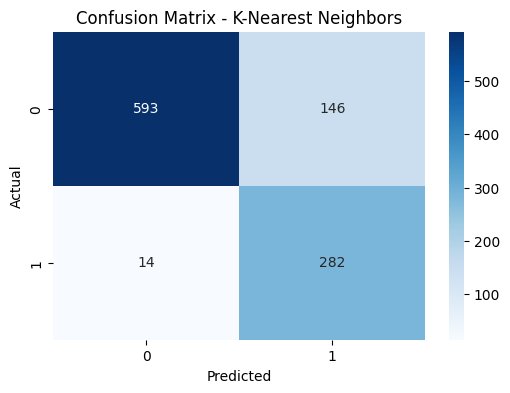

In [16]:
# Evaluate KNN
evaluate_model(y_test, y_pred_knn, 'K-Nearest Neighbors')

Performance of Support Vector Machine:
Accuracy: 0.9469
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



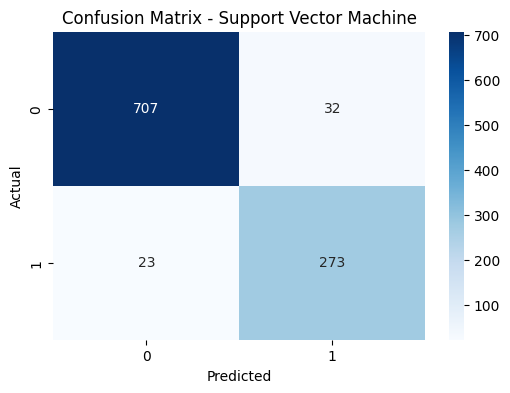

In [17]:
# Evaluate SVM
evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')